<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/n4369i3g2fkg38kendjtcbw6hzm4vel5.png" width = 100, align = "center"></a>

<h1 align=center><font size = 5>Lab 2b: Accessing Your Db2 Warehouse on Cloud Database with RODBC</h1>

### Welcome!

In this hands-on lab we will examine how to populate a relational database with source data. To accomplish this we will review some data modeling techniques, create tables and load the data.

We will then examine how to query the data from R using SQL and the RODBC interface.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Tasks</h3>
<ol><ol><ol>
<li><a href="#ref6a">Pre-requisites</a></li>
<li><a href="#ref6b">Create an R notebook</a></li>
<li><a href="#ref6c">Load RODBC</a></li>
<li><a href="#ref6d">Connection information</a></li>
<li><a href="#ref6e">Create a database connection</a></li>
<li><a href="#ref6f">Connection Attributes</a></li>
<li><a href="#ref6g">Connection Metadata</a></li>
<li><a href="#ref6h">Supported Datatypes</a></li>
<li><a href="#ref6i">List of Tables</a></li>
<li><a href="#ref6j">Columns in a Table</a></li>
<li><a href="#ref6k">Fetch Data</a></li>
<li><a href="#ref6l">Analyze</a></li>
<li><a href="#ref6m">Plot</a></li>
<li><a href="#ref6n">Dis-connect</a></li>
</ol></ol></ol>
<br>
Estimated Time Needed: <strong>25 min</strong>
</div>

<a id="ref6a"></a>
<h3>a. Pre-requisites</h3>

In this lab we will use Jupyter Notebooks within CC Labs to access data in a Db2 Warehouse on Cloud database (previously called dashDB) using RODBC.  Information about these services is provided in the lab setup.

<a id="ref6b"></a>
<h3>b. Create an R notebook</h3>

Create a new Jupyter notebook in CC Labs. Set it to use R (using the dropdown in the top right corner).

<img src=https://ibm.box.com/shared/static/vb8qv1tyq3b40sq4urgyfk9fwi2i8rpm.png width=50%>

<a id="ref6c"></a>
<h3>c. Load RODBC</h3>

The RODBC package and the ODBC driver for Db2 Warehouse are pre-installed on your workbench. Let’s create a new cell and load the RODBC package by typing the following command and executing it (Ctrl+Enter):

In [1]:
library(RODBC);

<div align="left">
<a href="#tipc" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipc" class="collapse"><br>
  
```
# Fill in the ...
library(...);
```
  
</div>

<div align="left">
<a href="#solc" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solc" class="collapse"><br>
  
```
library(RODBC);
```
  
</div>

<a id="ref6d"></a>
<h3>d. Connection information</h3>

In a new cell enter the connection details for your instance of Db2 Warehouse and run it. Remember to update the values for hostname, userid, and password. 

In [2]:
#Enter the values for you database connection

# dsn_driver = "com.ibm.db2.jcc.DB2Driver"    # NOTE: This line is from Lab2a and is not in the Db2 credentials info
dsn_driver <- "{IBM DB2 ODBC Driver}"         # NOTE: This appears to be an alternative way to specify the ODBC driver
dsn_database = "BLUDB"            # e.g. "BLUDB"      # all of the credentials info is under the section ("dsn":) near the bottom
dsn_hostname = "dashdb-entry-yp-dal10-01.services.dal.bluemix.net"   # e.g. replace <yourhostname> with your hostname, e.g., "Db2 Warehouse01.datascientstworkbench.com"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_uid = "dash100497"              # e.g. replace <userid> with your userid
dsn_pwd = "8_dKQbPO_j0o"            # e.g. replace <password> with your password


<div align="left">
<a href="#tipd"class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipd" class="collapse"><br>
  
```
# Fill in the <...>
dsn_driver <- "{...}"
dsn_database <- "..."            
dsn_hostname <- "<Enter Hostname>" 
dsn_port <- "..."                
dsn_protocol <- "..."            
dsn_uid <- "<Enter UserID>"        
dsn_pwd <- "<Enter Password>"     
```
  
</div>

<div align="left">
<a href="#sold" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="sold" class="collapse"><br>
  
```
dsn_driver <- "{IBM DB2 ODBC Driver}"
dsn_database <- "BLUDB"            # e.g. "BLUDB"
dsn_hostname <- "<Enter Hostname>" # e.g.: "awh-yp-small03.services.dal.bluemix.net"
dsn_port <- "50000"                # e.g. "50000" 
dsn_protocol <- "TCPIP"            # i.e. "TCPIP"
dsn_uid <- "<Enter UserID>"        # e.g. "dash104434"
dsn_pwd <- "<Enter Password>"      # e.g. "7dBZ39xN6$o0JiX!m"  
```
  
</div>

<a id="ref6e"></a>
<h3>e. Create a database connection</h3>

Create a connection string and connect:

In [3]:
# Since this uses the vaiables we created above for our credentials, this code never needs to change.
conn_path <- paste("DRIVER=",dsn_driver,
                  ";DATABASE=",dsn_database,
                  ";HOSTNAME=",dsn_hostname,
                  ";PORT=",dsn_port,
                  ";PROTOCOL=",dsn_protocol,
                  ";UID=",dsn_uid,
                  ";PWD=",dsn_pwd,sep="")
conn <- odbcDriverConnect(conn_path)
conn

RODBC Connection 1
Details:
  case=nochange
  DRIVER={IBM DB2 ODBC DRIVER}
  UID=dash100497
  PWD=******
  DATABASE=BLUDB
  HOSTNAME=dashdb-entry-yp-dal10-01.services.dal.bluemix.net
  PORT=50000
  PROTOCOL=TCPIP

<div align="left">
<a href="#tipe" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipe" class="collapse"><br>
  
```
# Fill in the ...
conn_path <- paste("DRIVER=",...
                  ";DATABASE=",...
                  ";HOSTNAME=",...
                  ";PORT=",...
                  ";PROTOCOL=",...
                  ";UID=",...
                  ";PWD=",...")
conn <- ...(...)
...
```
  
</div>

<div align="left">
<a href="#sole" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="sole" class="collapse"><br>
  
```
conn_path <- paste("DRIVER=",dsn_driver,
                  ";DATABASE=",dsn_database,
                  ";HOSTNAME=",dsn_hostname,
                  ";PORT=",dsn_port,
                  ";PROTOCOL=",dsn_protocol,
                  ";UID=",dsn_uid,
                  ";PWD=",dsn_pwd,sep="")
conn <- odbcDriverConnect(conn_path)
conn
```
  
</div>

<a id="ref6f"></a>
<h3>f. Connection Attributes</h3>

Let’s examine the connection attributes:

In [4]:
attributes(conn)

$connection.string
[1] "DRIVER={IBM DB2 ODBC DRIVER};UID=dash100497;PWD=******;DATABASE=BLUDB;HOSTNAME=dashdb-entry-yp-dal10-01.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;"

$handle_ptr
<pointer: 0x5652ded681d0>

$class
[1] "RODBC"

$case
[1] "nochange"

$id
[1] 30145

$believeNRows
[1] TRUE

$colQuote
[1] "\""

$tabQuote
[1] "\""

$interpretDot
[1] TRUE

$encoding
[1] ""

$rows_at_time
[1] 100

$isMySQL
[1] FALSE

$call
odbcDriverConnect(connection = "DRIVER={IBM DB2 ODBC Driver};DATABASE=BLUDB;HOSTNAME=dashdb-entry-yp-dal10-01.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=dash100497;PWD=******;")


<div align="left">
<a href="#tipf" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipf" class="collapse"><br>
  
```
# Fill in the ...
...(conn)
```
  
</div>

<div align="left">
<a href="#solf" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solf" class="collapse"><br>
  
```
attributes(conn)
```
  
</div>

<a id="ref6g"></a>
<h3>g. Connection Metadata</h3>

And review the connection metadata using  the odbcGetInfo() function:

In [5]:
conn.info <- odbcGetInfo(conn)

<div align="left">
<a href="#tipg1" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg1" class="collapse"><br>
  
```
conn.... <- odbc...(conn) 
```
  
</div>

<div align="left">
<a href="#solg1" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg1" class="collapse"><br>
  
```
conn.info <- odbcGetInfo(conn) 
```
  
</div>

In [6]:
conn.info["DBMS_Name"]
conn.info["DBMS_Ver"] 
conn.info["Driver_ODBC_Ver"]

DBMS_Name 
"DB2/LINUXX8664"

DBMS_Ver 
"11.01.0009"

Driver_ODBC_Ver 
        "03.51"

<div align="left">
<a href="#tipg2" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipg2" class="collapse"><br>
  
```
# Fill in the ...
conn....["DBMS_..."]
conn....["DBMS_..."] 
conn....["Driver_..._..."]
```
  
</div>

<div align="left">
<a href="#solg2" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solg2" class="collapse"><br>
  
```
conn.info["DBMS_Name"]
conn.info["DBMS_Ver"] 
conn.info["Driver_ODBC_Ver"]
```
  
</div>

<a id="ref6h"></a>
<h3>h. Supported Datatypes</h3>

Let’s now examine the datatypes supported by the database:

In [7]:
sql.info <- sqlTypeInfo(conn)
print(sql.info[c(1,3)], row.names=FALSE) 

                 TYPE_NAME COLUMN_SIZE
                       XML           0
                  DECFLOAT          34
                      CLOB  2147483647
                      BLOB  2147483647
 LONG VARCHAR FOR BIT DATA       32700
                 VARBINARY       32672
                    BINARY         254
              LONG VARCHAR       32700
                      CHAR         254
                   NUMERIC          31
                   DECIMAL          31
                   INTEGER          10
                  SMALLINT           5
                     FLOAT          53
                      REAL          24
                    DOUBLE          53
                   VARCHAR       32672
                      DATE          10
                      TIME           8
                 TIMESTAMP          32
                VARGRAPHIC       16336
                   GRAPHIC         127
           LONG VARGRAPHIC       16350
                    DBCLOB  1073741823
                    BIGIN

<div align="left">
<a href="#tiph" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tiph" class="collapse"><br>
  
```
# Fill in the ...
sql.... <- sql...(conn)
print(sql....[c(1,...)], row....=FALSE) 
```
  
</div>

<div align="left">
<a href="#solh" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solh" class="collapse"><br>
  
```
sql.info <- sqlTypeInfo(conn)
print(sql.info[c(1,3)], row.names=FALSE) 
```
  
</div>

<a id="ref6i"></a>
<h3>i. List of Tables</h3>

We will use the sqlTables() function to return a dataframe with information about table-like objects (i.e. TABLEs, VIEWs, ALIASes, etc.) in a specified schema called “GOSALES”. First we will output the number of tables in the schema, and then display their names.

In [8]:
tab.frame <- sqlTables(conn, schema="GOSALES")
nrow(tab.frame)
tab.frame$TABLE_NAME

[1] 24

[1] "BRANCH"               "CONVERSION_RATE"      "COUNTRY"             
 [4] "CURRENCY_LOOKUP"      "EURO_CONVERSION"      "INVENTORY_LEVELS"    
 [7] "ORDER_DETAILS"        "ORDER_HEADER"         "ORDER_METHOD"        
[10] "PRODUCT"              "PRODUCT_BRAND"        "PRODUCT_COLOR_LOOKUP"
[13] "PRODUCT_FORECAST"     "PRODUCT_LINE"         "PRODUCT_NAME_LOOKUP" 
[16] "PRODUCT_SIZE_LOOKUP"  "PRODUCT_TYPE"         "RETURNED_ITEM"       
[19] "RETURN_REASON"        "SALES_REGION"         "SALES_TARGET"        
[22] "TIME_DIMENSION"       "TIME_QUARTER_LOOKUP"  "XGOREV"

<div align="left">
<a href="#tipi" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipi" class="collapse"><br>
  
```
# Fill in the ...
tab.... <- sql...(conn, ...="GOSALES")
nrow(tab....)
tab.frame$...
```
  
</div>

<div align="left">
<a href="#soli" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="soli" class="collapse"><br>
  
```
tab.frame <- sqlTables(conn, schema="GOSALES")
nrow(tab.frame)
tab.frame$TABLE_NAME
```
  
</div>

<a id="ref6j"></a>
<h3>j. Columns in a Table</h3>

Next, let’s look at column metadata for columns in a sample table like “GOSALES.ORDER_DETAILS” in the database:

In [9]:
tab.name <- "GOSALES.ORDER_DETAILS"
col.detail <- sqlColumns(conn, tab.name)
print(col.detail[c(4,6,7,9,18)], row.names=FALSE)

       COLUMN_NAME TYPE_NAME COLUMN_SIZE DECIMAL_DIGITS IS_NULLABLE
 ORDER_DETAIL_CODE   INTEGER          10              0          NO
      ORDER_NUMBER   INTEGER          10              0          NO
         SHIP_DATE TIMESTAMP          26              6          NO
    PRODUCT_NUMBER   INTEGER          10              0          NO
    PROMOTION_CODE   INTEGER          10              0          NO
          QUANTITY    BIGINT          19              0          NO
         UNIT_COST   DECIMAL          19              2         YES
        UNIT_PRICE   DECIMAL          19              2         YES
   UNIT_SALE_PRICE   DECIMAL          19              2         YES


<div align="left">
<a href="#tipj" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipj" class="collapse"><br>
  
```
# Fill in the ...
tab.... <- "GOSALES...."
col.detail <- sql...(conn, tab....)
print(....detail[c(...,...,7,...,...)], row....=FALSE)
```
  
</div>

<div align="left">
<a href="#solj" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solj" class="collapse"><br>
  
```
tab.name <- "GOSALES.ORDER_DETAILS"
col.detail <- sqlColumns(conn, tab.name)
print(col.detail[c(4,6,7,9,18)], row.names=FALSE)
```
  
</div>

<a id="ref6k"></a>
<h3>k. Fetch Data</h3>

Now let’s use the SQLFetch() function to retrieve the contents of the table (Note: ORDER_DETAILS table has almost half a million rows and hence this may take a little long to run) into a R dataframe. See how many rows are there and examine the datatypes of columns in the dataframe. Compare them to the datatypes in the columns of the corresponding table in the database (see previous step).

In [10]:
# This may take 30 seconds or more to run - output will appear below when finished
orderdet <- sqlFetch(conn, tab.name)
nrow(orderdet)
str(orderdet)

[1] 446023

'data.frame':	446023 obs. of  9 variables:
 $ ORDER_DETAIL_CODE: int  1000001 1000002 1000013 1000014 1000015 1000016 1000017 1000028 1000029 1000030 ...
 $ ORDER_NUMBER     : int  100001 100001 100002 100002 100002 100002 100002 100003 100003 100003 ...
 $ SHIP_DATE        : POSIXct, format: "2010-01-19" "2010-02-17" ...
 $ PRODUCT_NUMBER   : int  41110 69110 75110 76110 85110 65110 100110 90110 95110 79110 ...
 $ PROMOTION_CODE   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ QUANTITY         : int  256 92 162 172 74 90 422 3252 1107 88 ...
 $ UNIT_COST        : num  15.6 49.7 80 23.5 176.5 ...
 $ UNIT_PRICE       : num  35.1 110 119.7 40.5 359.6 ...
 $ UNIT_SALE_PRICE  : num  33.7 102.3 111.3 38.9 334.4 ...


<div align="left">
<a href="#tipk" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipk" class="collapse"><br>
  
```
# Fill in the ...
order... <- sql...(conn, tab....)
nrow(...)
str(...)
```
  
</div>

<div align="left">
<a href="#solk" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solk" class="collapse"><br>
  
```
orderdet <- sqlFetch(conn, tab.name)
nrow(orderdet)
str(orderdet)
```
  
</div>

<a id="ref6l"></a>
<h3>l. Analyze</h3>

Now that we have the data in a R dataframe let’s, we can do some analysis. Let’s see if there is any co-relation between the number of orders by month. First, add a MONTH column to the dataframe that extracts the month number from the SHIP_DATE. Then add a new column having a value of 1 in every row.

In [11]:
# We should begin by examining the distribution of SHIP_DATE to better understand the data.
# Unfortunately, this exercise does not do this.
orderdet$MONTH <- c(as.integer(format(orderdet$SHIP_DATE,"%m")))
orderdet$ONES <- rep(1,nrow(orderdet))

<div align="left">
<a href="#tipl1" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipl1" class="collapse"><br>
  
```
# Fill in the ...
orderdet$... <- c(as....(format(orderdet$...,"%...")))
orderdet$... <- rep(1,n...(order...))
```
  
</div>

<div align="left">
<a href="#soll1" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="soll1" class="collapse"><br>
  
```
orderdet$MONTH <- c(as.integer(format(orderdet$SHIP_DATE,"%m")))
orderdet$ONES <- rep(1,nrow(orderdet))
```
  
</div>

Let’s find out the total numbers of orders per month. We can create a new dataframe containing the total number of orders by month.

In [12]:
# NOTE: It is possible that there are multiple years where some months may have more years than other months
orderspermonth <- aggregate(orderdet$ONES,by=list(MONTH=orderdet$MONTH), FUN=sum)
orderspermonth

MONTH,x
1,40002
2,40858
3,41823
4,41762
5,42769
6,41773
7,43423
8,30219
9,29815
10,31516


<div align="left">
<a href="#tipl2" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipl2" class="collapse"><br>
  
```
# Fill in the ...
orders... <- aggregate(...$ONES,by=...(MONTH=...$...), FUN=...)
orders...
```
  
</div>

<div align="left">
<a href="#soll2" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="soll2" class="collapse"><br>
  
```
orderspermonth <- aggregate(orderdet$ONES,by=list(MONTH=orderdet$MONTH), FUN=sum)
orderspermonth
```
  
</div>

<a id="ref6m"></a>
<h3>m. Plot</h3>

Create a simple scatter plot. Which month had most orders? Does there appear to be any co-relation?

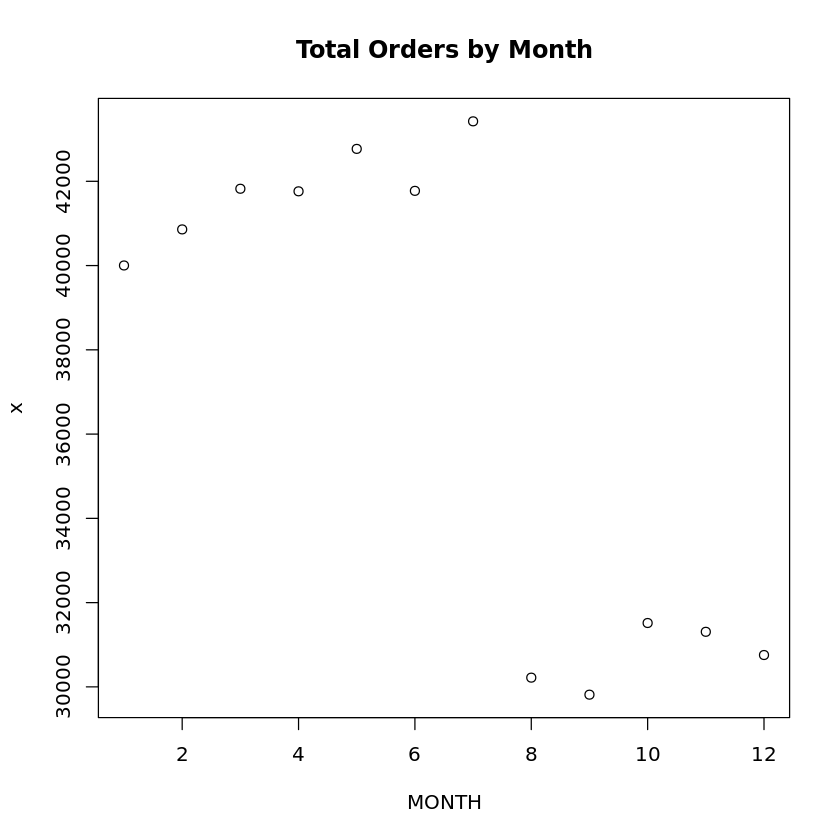

In [13]:
# NOTE: the scatter plot suggests that months 8-12 have 3 years of data and months 1-7 have 4 years.
with(orderspermonth, plot(MONTH,x, main="Total Orders by Month" ))

<div align="left">
<a href="#tipm" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipm" class="collapse"><br>
  
```
# Fill in the ...
with(orders..., plot(...,..., main="..." ))
```
  
</div>

<div align="left">
<a href="#solm" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="solm" class="collapse"><br>
  
```
with(orderspermonth, plot(MONTH,x, main="Total Orders by Month" ))
```
  
</div>

<a id="ref6n"></a>
<h3>n. Dis-connect</h3>

Finally, as a best practice we should close the database connection once we're done with it.

In [14]:
odbcCloseAll()

<div align="left">
<a href="#tipn" class="btn btn-default" data-toggle="collapse" >Click here to view/hide tip</a></div>
<div id="tipn" class="collapse"><br>
  
```
odbc...()
```
  
</div>

<div align="left">
<a href="#soln" class="btn btn-default" data-toggle="collapse" >Click here to view/hide solution</a></div>
<div id="soln" class="collapse"><br>
  
```
odbcCloseAll()
```
  
</div>

<a id="ref6o"></a>
<h3>Summary</h3>

In this lab you accessed data in a Db2 Warehouse data warehouse using RODBC connection from an R notebook in Jupyter.

This notebook is part of the free course on Cognitive Class called *Using R with Databases*. If you accessed this notebook outside the course, you can take this free self-paced course, online by going to: https://cognitiveclass.ai/courses/using-r-with-databases/

<hr>
<h3>Tell your friends that you're taking the Using R with Database course!</h3>

<script type="text/javascript" async src="https://platform.twitter.com/widgets.js"></script>

<a href=https://twitter.com/intent/tweet?url=https%3A%2F%2Fgoo.gl%2Fb6kJAj&via=bigdatau&text=I%20can%20now%20program%20in%20R!%20I%20finished%20this%20R%20course%20on%20IBM%27s%20Big%20Data%20University!&hashtags=rstats%2Cdatascience&related=bigdatau>
<textarea name="textarea1" disabled="disabled" style="resize:none;border-color:#00aced;color:#808080;height:80px" cols=75>Just learnt how to use #RODBC to access my Db2 Warehouse from #jupyter notebooks Thanks @cognitiveclass</textarea></a>
<p></p><a class="twitter-share-button" data-size=large href=https://twitter.com/intent/tweet?url=https%3A%2F%2Fgoo.gl%2Fb6kJAj&via=bigdatau&text=I%20can%20now%20program%20in%20R!%20I%20finished%20this%20R%20course%20on%20IBM%27s%20Big%20Data%20University!&hashtags=rstats%2Cdatascience&related=bigdatau></a>

<a href=https://twitter.com/intent/tweet?text=Just+learnt+how+to+use+%23RODBC+to+access+my+Db2 Warehouse+from+%23jupyter+notebooks+Thanks+%40BigDataU>Tweet Now!</a>

#### Thank you for completing this module on getting connected and querying databases using RJDBC and RODBC.

<hr>
### About the Authors:  
Hi! It's [Rav Ahuja](https://ca.linkedin.com/in/rav-ahuja-8aa4562a) and [Agatha Colangelo](https://www.linkedin.com/in/agathacolangelo), the authors of this notebook. We hope you found this lab easy to do! There's lots more to learn about R and Relational Databases but you're well on your way. Feel free to connect with us if you have any questions.
<hr>

Copyright &copy; 2017 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).